In [63]:
import pandas as pd
import matplotlib.pyplot as plt

interim_path = "../data/interim/"

In [20]:
df = pd.read_csv(interim_path+"sp500sub.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,2016-03-23,41.406097,41.406097,41.207508,41.207508,41.207508,201,UA
1,2016-03-24,40.581947,40.581947,40.581947,40.581947,40.581947,100,UA
2,2016-03-28,40.581947,40.581947,40.581947,40.581947,40.581947,0,UA
3,2016-03-29,40.581947,40.581947,40.581947,40.581947,40.581947,0,UA
4,2016-03-30,41.187649,41.703983,41.177719,41.703983,41.703983,3751,UA


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137879 entries, 0 to 137878
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       137879 non-null  object 
 1   Open       137879 non-null  float64
 2   High       137879 non-null  float64
 3   Low        137879 non-null  float64
 4   Close      137879 non-null  float64
 5   Adj Close  137879 non-null  float64
 6   Volume     137879 non-null  int64  
 7   Name       137879 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 8.4+ MB


In [24]:
print(f"""Qty of stocks: {df["Name"].nunique()}""")

Qty of stocks: 113


In [32]:
date_min = df["Date"].min()
date_max = df["Date"].max()

print(f"""Range of the data: from {date_min} to {date_max} with {df["Date"].nunique()} unique dates.""")

Range of the data: from 2016-01-04 to 2020-12-30 with 1258 unique dates.


In [34]:
df_close_prices = pd.pivot_table(df, values='Close', columns=['Name'], index=['Date'])

print(f"""After getting only close prices and pivoting table, we get {df_close_prices.shape[0]} observations (or dates), and {df_close_prices.shape[1]} columns (or stocks).
""")

df_close_prices.head()

After getting only close prices and pivoting table, we get 1258 observations (or dates), and 113 columns (or stocks).



Name,AAP,AAPL,ABBV,ABT,ACN,ADBE,ADP,AEP,AES,AFL,...,UHS,UNH,VAR,VZ,WMT,XEC,XEL,XL,XLNX,XRX
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,152.240005,26.337500,57.610001,42.930000,101.830002,91.970001,82.070000,58.330002,9.43,29.590000,...,117.919998,116.459999,68.968185,45.869999,61.459999,90.000000,35.700001,NaN,45.799999,27.140976
2016-01-05,151.199997,25.677500,57.369999,42.919998,102.360001,92.339996,82.269997,58.810001,9.56,29.549999,...,118.430000,116.680000,69.134796,46.500000,62.919998,90.580002,36.060001,NaN,46.480000,27.088274
2016-01-06,147.199997,25.174999,57.380001,42.560001,102.160004,91.019997,81.260002,59.029999,9.23,29.100000,...,115.699997,115.489998,68.775269,45.520000,63.549999,85.040001,36.439999,NaN,45.630001,26.745718
2016-01-07,148.830002,24.112499,57.209999,41.540001,99.160004,89.110001,78.779999,58.349998,9.00,28.605000,...,112.900002,112.089996,67.345917,45.270000,65.029999,81.860001,36.580002,NaN,43.830002,26.007904
2016-01-08,145.559998,24.240000,55.650002,40.669998,98.199997,87.849998,78.129997,58.259998,9.13,28.355000,...,112.379997,110.160004,67.126694,44.830002,63.540001,82.320000,36.180000,NaN,42.930000,25.270092


In [92]:
print("CAUTION! The following stocks have NaN values.")

lst_null_stocks = (df_close_prices.isnull().sum()[df_close_prices.isnull().sum()>0].sort_values(ascending=False)).index
lst_null_stocks = lst_null_stocks.tolist()

df_close_prices.isnull().sum()[df_close_prices.isnull().sum()>0].sort_values(ascending=False)

CAUTION! The following stocks have NaN values.


Name
PX      1221
XL       922
FOX      802
FOXA     801
NFX      474
UA        55
dtype: int64

In [50]:
df_close_prices.to_parquet(interim_path+"sp500sub_close.pqt")

In [53]:
df_close_prices_2 = pd.read_parquet(interim_path+"sp500sub_close.pqt")

print(f"""Loading data and parsing by date, we get {df_close_prices_2.shape[0]} observations (or dates), and {df_close_prices_2.shape[1]} columns (or stocks).""")

df_close_prices_2.head()

Loading data and parsing by date, we get 1258 observations (or dates), and 113 columns (or stocks).


Name,AAP,AAPL,ABBV,ABT,ACN,ADBE,ADP,AEP,AES,AFL,...,UHS,UNH,VAR,VZ,WMT,XEC,XEL,XL,XLNX,XRX
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,152.240005,26.337500,57.610001,42.930000,101.830002,91.970001,82.070000,58.330002,9.43,29.590000,...,117.919998,116.459999,68.968185,45.869999,61.459999,90.000000,35.700001,NaN,45.799999,27.140976
2016-01-05,151.199997,25.677500,57.369999,42.919998,102.360001,92.339996,82.269997,58.810001,9.56,29.549999,...,118.430000,116.680000,69.134796,46.500000,62.919998,90.580002,36.060001,NaN,46.480000,27.088274
2016-01-06,147.199997,25.174999,57.380001,42.560001,102.160004,91.019997,81.260002,59.029999,9.23,29.100000,...,115.699997,115.489998,68.775269,45.520000,63.549999,85.040001,36.439999,NaN,45.630001,26.745718
2016-01-07,148.830002,24.112499,57.209999,41.540001,99.160004,89.110001,78.779999,58.349998,9.00,28.605000,...,112.900002,112.089996,67.345917,45.270000,65.029999,81.860001,36.580002,NaN,43.830002,26.007904
2016-01-08,145.559998,24.240000,55.650002,40.669998,98.199997,87.849998,78.129997,58.259998,9.13,28.355000,...,112.379997,110.160004,67.126694,44.830002,63.540001,82.320000,36.180000,NaN,42.930000,25.270092


# Dealing with missing data

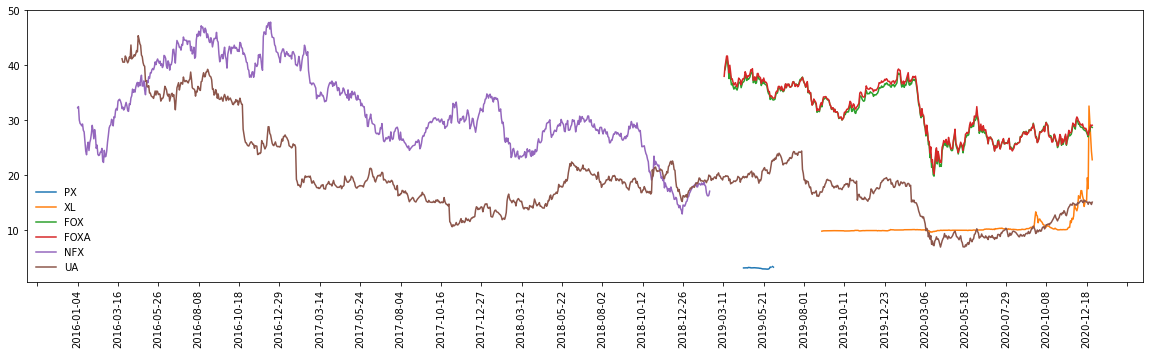

In [100]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)

for stock in lst_null_stocks:
    ax.plot(df_close_prices_2[stock], label=stock)

ax.xaxis.set_major_locator(plt.MaxNLocator(30))

ax.legend(loc='lower left', frameon=False)
plt.xticks(rotation=90)
plt.show();

## Removing holidays and weekends

In [ ]:
df_close_prices_cleaning = df_close_prices_2.dropna(axis=0, how='all').copy()

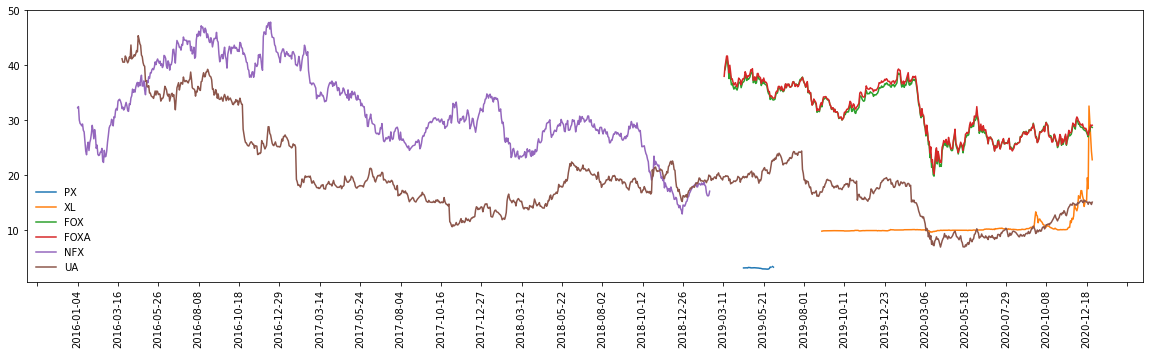

In [102]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)

for stock in lst_null_stocks:
    ax.plot(df_close_prices_cleaning[stock], label=stock)

ax.xaxis.set_major_locator(plt.MaxNLocator(30))

ax.legend(loc='lower left', frameon=False)
plt.xticks(rotation=90)
plt.show();

In [103]:
print("CAUTION! The following stocks have NaN values.")

df_close_prices_cleaning.isnull().sum()[df_close_prices_cleaning.isnull().sum()>0].sort_values(ascending=False)

CAUTION! The following stocks have NaN values.


Name
PX      1221
XL       922
FOX      802
FOXA     801
NFX      474
UA        55
dtype: int64

## Foward fill and backward fill

In [105]:
print(f"""Total NaNs before foward fill: {df_close_prices_cleaning.isna().sum().sum()}""")

Total NaNs before foward fill: 4275


In [107]:
df_close_prices_cleaning.fillna(method='ffill', inplace=True)

print(f"""Total NaNs AFTER foward fill: {df_close_prices_cleaning.isna().sum().sum()}""")

Total NaNs AFTER foward fill: 3405


In [108]:
df_close_prices_cleaning.fillna(method='bfill', inplace=True)

print(f"""Total NaNs AFTER backward fill: {df_close_prices_cleaning.isna().sum().sum()}""")

Total NaNs AFTER backward fill: 0


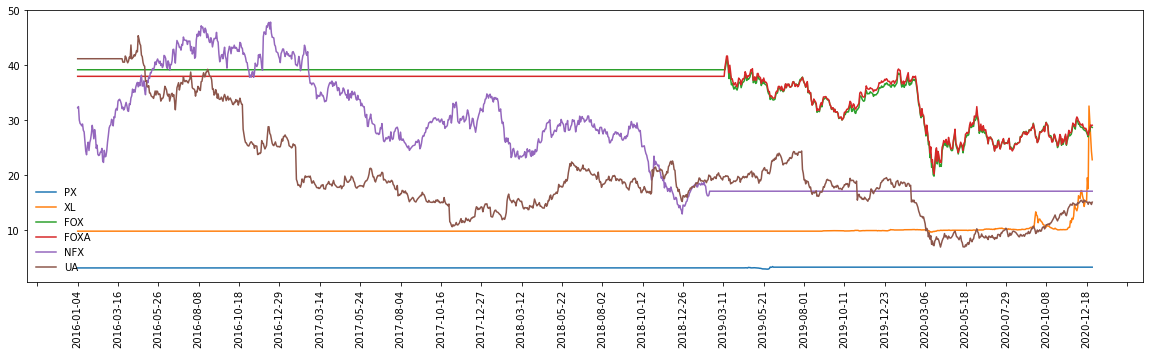

In [109]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)

for stock in lst_null_stocks:
    ax.plot(df_close_prices_cleaning[stock], label=stock)

ax.xaxis.set_major_locator(plt.MaxNLocator(30))

ax.legend(loc='lower left', frameon=False)
plt.xticks(rotation=90)
plt.show();

# Normalised stock values

In [111]:
df_close_prices_normalised = df_close_prices_cleaning/df_close_prices_cleaning.iloc[0]

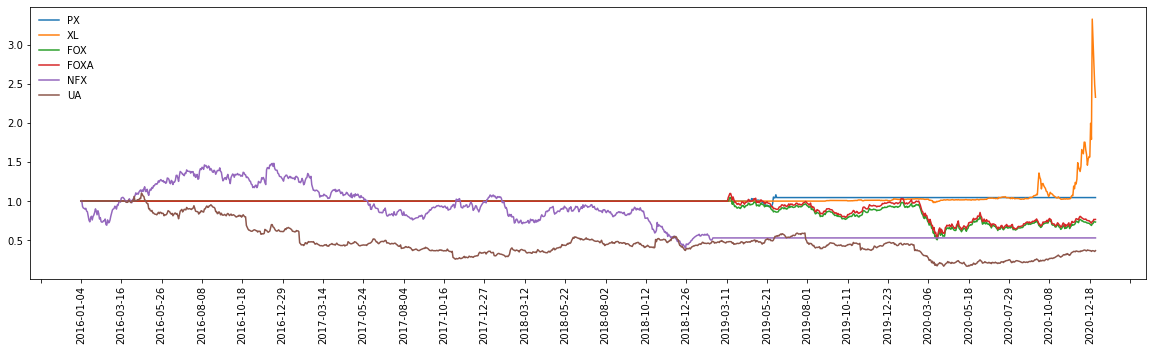

In [113]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)

for stock in lst_null_stocks:
    ax.plot(df_close_prices_normalised[stock], label=stock)

ax.xaxis.set_major_locator(plt.MaxNLocator(30))

ax.legend(loc='upper left', frameon=False)
plt.xticks(rotation=90)
plt.show();